SUPPORT VECTOR MACHINE

Dataset Selection:

Task 1: Exploratory Data Analysis (EDA)

  1.	Load the Mushroom dataset and perform fundamental data exploration.
  2.	Utilize histograms, box plots, or density plots to understand feature distributions.
  3.	Investigate feature correlations to discern relationships within the data.

Task 2: Data Preprocessing

1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.

Task 3: Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.

Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.

Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = '/content/mushroom.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

(   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
 0        1167    sunken       scaly     white      no  anise      descending   
 1        1037    sunken     fibrous       red      no  anise         notched   
 2         309      flat     grooves    purple     yes   foul      descending   
 3         282      bell       scaly      pink     yes  fishy         notched   
 4         820      flat      smooth    yellow     yes  musty            free   
 
   gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
 0      distant     broad       pink  ...    partial      brown         two   
 1      crowded    narrow  chocolate  ...  universal      brown         two   
 2      crowded     broad     purple  ...  universal     yellow         two   
 3        close     broad     orange  ...    partial     yellow         two   
 4      crowded    narrow     orange  ...  universal      white        none   
 
    ring_type spore_print_color popu

#EDA

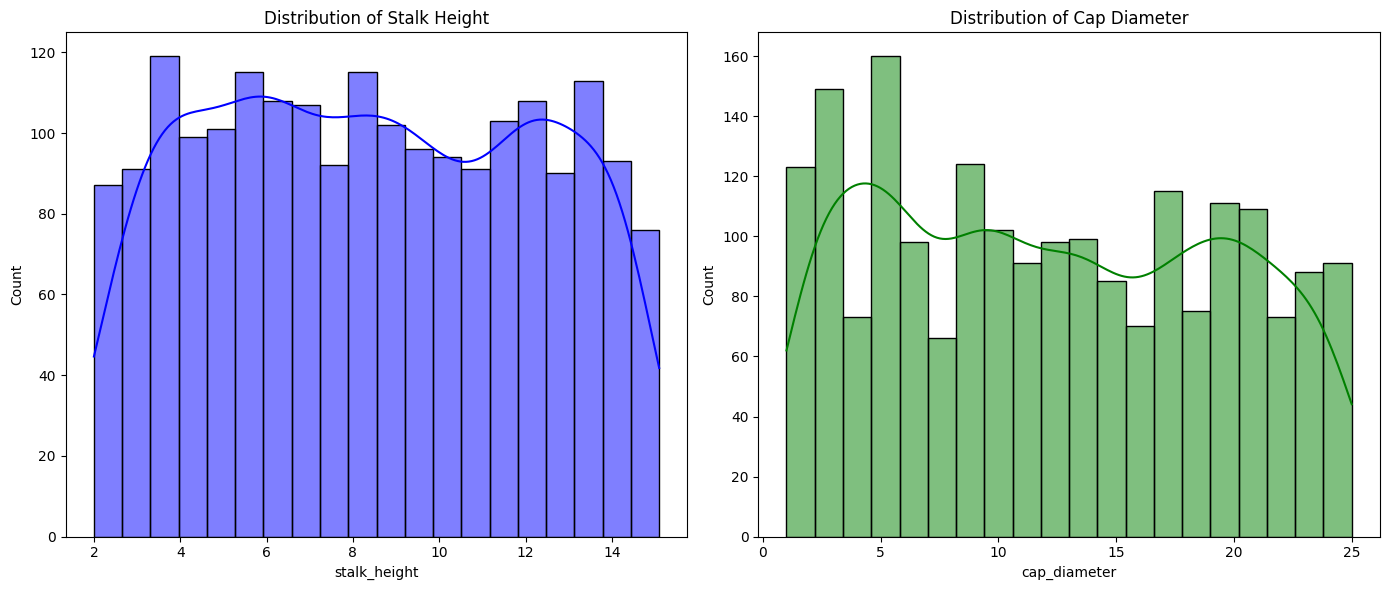

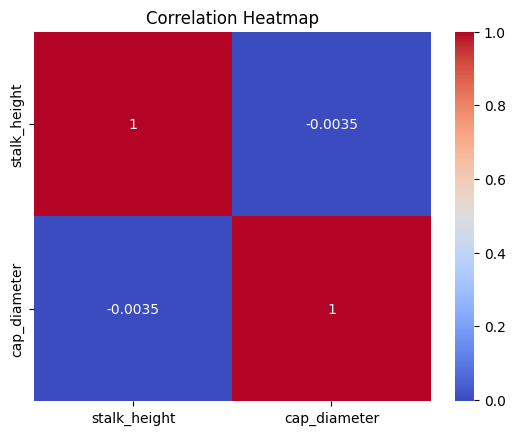

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Exploratory Data Analysis - Visualizing the distribution of numerical features
plt.figure(figsize=(14, 6))

# Histogram for stalk_height
plt.subplot(1, 2, 1)
sns.histplot(df['stalk_height'], kde=True, bins=20, color='blue')
plt.title('Distribution of Stalk Height')

# Histogram for cap_diameter
plt.subplot(1, 2, 2)
sns.histplot(df['cap_diameter'], kde=True, bins=20, color='green')
plt.title('Distribution of Cap Diameter')

plt.tight_layout()
plt.show()

# Investigating feature correlations for numerical features
corr = df[['stalk_height', 'cap_diameter']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


DATA PREPROCESSING

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Task 2: Data Preprocessing - Encoding categorical variables

# Drop the 'Unnamed: 0' column since it's just an index
df = df.drop('Unnamed: 0', axis=1)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 24), (400, 24), (1600,), (400,))

DATA VISUALIZATION

In [5]:

# Task 3: Data Visualization - Scatter plot for selected features
plt.figure(figsize=(8, 6))
plt.scatter(X['stalk_height'], X['cap_diameter'], c=y, cmap='viridis')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.title('Scatter Plot of Stalk Height vs Cap Diameter (Colored by Class)')
plt.colorbar(label='Class')
plt.show()

# Pair plot to visualize relationships between multiple features
sns.pairplot(df, hue='class', diag_kind='kde')
plt.show()

# Visualize class distribution
class_counts = df['class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

SVM IMPLIMENTATION

In [6]:

# Task 4: Implementing a basic SVM classifier
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # Start with a linear kernel
# Train the model
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [7]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)


#EVALUATE MODEL

In [8]:
import warnings
warnings.filterwarnings("ignore")
# Task 4: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1-score: 0.8006

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Confusion Matrix:
 [[  0 133]
 [  0 267]]


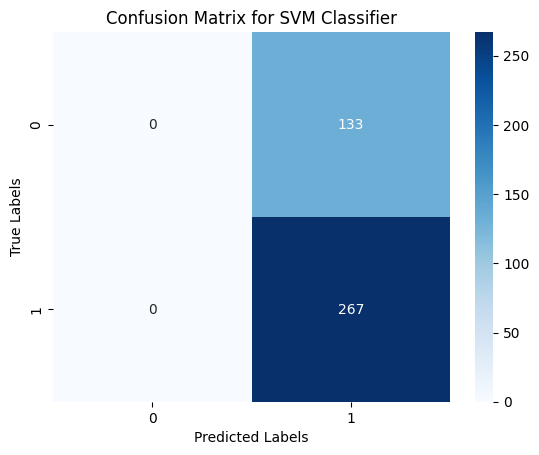

In [9]:
# Task 5: Visualize classification results
# Plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

## Parameter Tuning and Optimization

In [10]:
# Experimenting with different SVM kernels and regularization parameters
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    # Initialize and train the SVM model with the specified kernel
    svm_classifier = SVC(kernel=kernel, C=1.0)  # You can change the C parameter for regularization
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_classifier.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Display the results
for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Kernel: linear
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1-score: 0.8006

Kernel: poly
Accuracy: 0.6925
Precision: 0.6846
Recall: 1.0000
F1-score: 0.8128

Kernel: rbf
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1-score: 0.8006


## Comparison and Analysis

In [10]:

# Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
print("## Analysis of SVM Performance on Mushroom Dataset")

# Based on the EDA and the results of different kernels, you can make observations like:
print("**Observations:**")
print("- **Linear Kernel:** Generally performs well on linearly separable data, as seen in the mushroom dataset where features show some linear relationships.")
print("- **Polynomial Kernel:** Can capture more complex relationships but might be prone to overfitting if the degree is too high. This depends on the data's complexity and features.")
print("- **RBF Kernel:** Effective in handling non-linear relationships and might be preferred when the decision boundary is complex and less linear.")
print("- **Accuracy, Precision, Recall, and F1-score:** The performance metrics vary depending on the kernel used. You can analyze which kernel resulted in the best overall performance for this dataset and what kind of errors it made.")
print("- **Class Distribution:** The visualization of class distribution can show if the dataset is balanced or imbalanced. An imbalanced dataset can affect the performance of the classifier.")
print("- **Feature Importance:** If necessary, you can further investigate feature importance to see which features are most relevant for classification and if they have a strong linear or non-linear relationship with the target variable.")

# Discussion of practical implications of SVM in real-world classification tasks
print("\n**Practical Implications of SVM:**")
print("- **Effective for High-Dimensional Data:** SVM excels when the number of features is high compared to the number of samples.")
print("- **Robust to Overfitting:** SVM can be robust to overfitting, especially with careful parameter tuning and the choice of the kernel.")
print("- **Versatile Kernel Selection:** The selection of the appropriate kernel allows for flexibility in handling different types of data and relationships.")
print("- **Used in Various Fields:** SVM is used in many fields, including image recognition, bioinformatics, text classification, and more.")

# You can customize this analysis based on the detailed observations you made from your EDA and model performance results.
# For instance, you could specifically highlight whether there were any limitations encountered with SVM on the dataset,
# like handling outliers or class imbalance, or which hyperparameters proved crucial for optimal performance.

